In [6]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('/workspaces/ML-Assignment5/layoffs_and_stocks.csv', parse_dates=['DATE'])
data.head()

,DATE,sector,layoffs,ticker,Date,price,log_return
0,2000-12-01,Accommodation and Food Services,133,XLY,2000-12-01,19.431828,NaN
1,2001-01-01,Accommodation and Food Services,191,XLY,2001-01-01,21.745836,0.119083
2,2001-02-01,Accommodation and Food Services,93,XLY,2001-02-01,20.193089,-0.071404
3,2001-03-01,Accommodation and Food Services,207,XLY,2001-03-01,19.858204,-0.016584
4,2001-04-01,Accommodation and Food Services,257,XLY,2001-04-01,20.821493,0.048508


In [8]:
data['sector'].unique()

array(['Accommodation and Food Services',
       'Arts, Entertainment, and Recreation', 'Construction',
       'Education and Health Services', 'Finance and Insurance',
       'Financial Activities', 'Government',
       'Health Care and Social Assistance', 'Information',
       'Leisure and Hospitality', 'Manufacturing', 'Mining and Logging',
       'Professional and Business Services',
       'Real Estate and Rental and Leasing', 'Retail Trade',
       'State and Local', 'Trade, Transportation, and Utilities',
       'Transportation, Warehousing, and Utilities'], dtype=object)

In [10]:
data.sort_values(by=['sector', 'DATE'], inplace=True)
data.head(10)

,DATE,sector,layoffs,ticker,Date,price,log_return
0,2000-12-01,Accommodation and Food Services,133,XLY,2000-12-01,19.431828,NaN
1,2001-01-01,Accommodation and Food Services,191,XLY,2001-01-01,21.745836,0.119083
2,2001-02-01,Accommodation and Food Services,93,XLY,2001-02-01,20.193089,-0.071404
3,2001-03-01,Accommodation and Food Services,207,XLY,2001-03-01,19.858204,-0.016584
4,2001-04-01,Accommodation and Food Services,257,XLY,2001-04-01,20.821493,0.048508
5,2001-05-01,Accommodation and Food Services,125,XLY,2001-05-01,21.317245,0.023810
6,2001-06-01,Accommodation and Food Services,186,XLY,2001-06-01,21.103689,-0.010018
7,2001-07-01,Accommodation and Food Services,207,XLY,2001-07-01,22.089520,0.046714
8,2001-08-01,Accommodation and Food Services,166,XLY,2001-08-01,20.155727,-0.087543
9,2001-09-01,Accommodation and Food Services,269,XLY,2001-09-01,17.556969,-0.128934


In [11]:
data.tail(10)

,DATE,sector,layoffs,ticker,Date,price,log_return
4976,2023-03-01,"Transportation, Warehousing, and Utilities",70,XLY,2023-03-01,148.256409,0.027484
4977,2023-04-01,"Transportation, Warehousing, and Utilities",61,XLY,2023-04-01,147.038177,-0.008217
4978,2023-05-01,"Transportation, Warehousing, and Utilities",48,XLY,2023-05-01,150.767319,0.025362
4979,2023-06-01,"Transportation, Warehousing, and Utilities",63,XLY,2023-06-01,168.866165,0.120045
4980,2023-07-01,"Transportation, Warehousing, and Utilities",76,XLY,2023-07-01,173.121841,0.025201
4981,2023-08-01,"Transportation, Warehousing, and Utilities",80,XLY,2023-08-01,170.102631,-0.017440
4982,2023-09-01,"Transportation, Warehousing, and Utilities",68,XLY,2023-09-01,160.407257,-0.056997
4983,2023-10-01,"Transportation, Warehousing, and Utilities",99,XLY,2023-10-01,151.828415,-0.053482
4984,2023-11-01,"Transportation, Warehousing, and Utilities",94,XLY,2023-11-01,168.478622,0.109665
4985,2023-12-01,"Transportation, Warehousing, and Utilities",191,XLY,2023-12-01,178.490707,0.059426


In [15]:
filtered_data = data[data['DATE'] != '2000-12-01']
filtered_data.head()

,DATE,sector,layoffs,ticker,Date,price,log_return
1,2001-01-01,Accommodation and Food Services,191,XLY,2001-01-01,21.745836,0.119083
2,2001-02-01,Accommodation and Food Services,93,XLY,2001-02-01,20.193089,-0.071404
3,2001-03-01,Accommodation and Food Services,207,XLY,2001-03-01,19.858204,-0.016584
4,2001-04-01,Accommodation and Food Services,257,XLY,2001-04-01,20.821493,0.048508
5,2001-05-01,Accommodation and Food Services,125,XLY,2001-05-01,21.317245,0.023810


In [16]:
missing_value_count = filtered_data['log_return'].isna().sum()
missing_value_count

75

In [17]:
food = filtered_data.loc[filtered_data['sector'] == 'Accommodation and Food Services']
arts = filtered_data.loc[filtered_data['sector'] == 'Arts, Entertainment, and Recreation']
construction = filtered_data.loc[filtered_data['sector'] == 'Construction']
education = filtered_data.loc[filtered_data['sector'] == 'Education and Health Services']
insurance = filtered_data.loc[filtered_data['sector'] == 'Finance and Insurance']
finance = filtered_data.loc[filtered_data['sector'] == 'Financial Activities']
government = filtered_data.loc[filtered_data['sector'] == 'Government']
healthcare = filtered_data.loc[filtered_data['sector'] == 'Health Care and Social Assistance']
information = filtered_data.loc[filtered_data['sector'] == 'Information']
hospitality = filtered_data.loc[filtered_data['sector'] == 'Leisure and Hospitality']
manufacturing = filtered_data.loc[filtered_data['sector'] == 'Manufacturing']
mining = filtered_data.loc[filtered_data['sector'] == 'Mining and Logging']
professional_services = filtered_data.loc[filtered_data['sector'] == 'Professional and Business Services']
real_estate = filtered_data.loc[filtered_data['sector'] == 'Real Estate and Rental and Leasing']
retail_trade = filtered_data.loc[filtered_data['sector'] == 'Retail Trade']
state_local = filtered_data.loc[filtered_data['sector'] == 'State and Local']
trade_trans_utility = filtered_data.loc[filtered_data['sector'] == 'Trade, Transportation, and Utilities']
wareh_trans_utility = filtered_data.loc[filtered_data['sector'] == 'Transportation, Warehousing, and Utilities']

In [18]:
""" 1. Food """
# check if food has missing values before calculation of moving_averages
food_missing = food['log_return'].isna().sum()
food_missing

0

In [20]:
food['moving_averages'] = food['log_return'].rolling(window=3, min_periods=1).mean()
food

/tmp/ipykernel_1838/3130474027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food['moving_averages'] = food['log_return'].rolling(window=3, min_periods=1).mean()


,DATE,sector,layoffs,ticker,Date,price,log_return,moving_averages
1,2001-01-01,Accommodation and Food Services,191,XLY,2001-01-01,21.745836,0.119083,0.119083
2,2001-02-01,Accommodation and Food Services,93,XLY,2001-02-01,20.193089,-0.071404,0.023840
3,2001-03-01,Accommodation and Food Services,207,XLY,2001-03-01,19.858204,-0.016584,0.010365
4,2001-04-01,Accommodation and Food Services,257,XLY,2001-04-01,20.821493,0.048508,-0.013160
5,2001-05-01,Accommodation and Food Services,125,XLY,2001-05-01,21.317245,0.023810,0.018578
...,...,...,...,...,...,...,...,...
272,2023-08-01,Accommodation and Food Services,189,XLY,2023-08-01,170.102631,-0.017440,0.042602
273,2023-09-01,Accommodation and Food Services,218,XLY,2023-09-01,160.407257,-0.056997,-0.016412
274,2023-10-01,Accommodation and Food Services,236,XLY,2023-10-01,151.828415,-0.053482,-0.042640
275,2023-11-01,Accommodation and Food Services,105,XLY,2023-11-01,168.478622,0.109665,-0.000271


In [22]:
food_recent_years = food[food['DATE'].dt.year.isin([2021, 2022, 2023])]
food_recent_years

,DATE,sector,layoffs,ticker,Date,price,log_return,moving_averages
241,2021-01-01,Accommodation and Food Services,145,XLY,2021-01-01,158.270111,0.009518,0.043951
242,2021-02-01,Accommodation and Food Services,114,XLY,2021-02-01,157.429962,-0.005308,0.008864
243,2021-03-01,Accommodation and Food Services,133,XLY,2021-03-01,164.190247,0.042942,0.015717
244,2021-04-01,Accommodation and Food Services,171,XLY,2021-04-01,175.067444,0.066248,0.034627
245,2021-05-01,Accommodation and Food Services,105,XLY,2021-05-01,169.118317,-0.033982,0.025069
246,2021-06-01,Accommodation and Food Services,109,XLY,2021-06-01,174.705399,0.033037,0.021767
247,2021-07-01,Accommodation and Food Services,121,XLY,2021-07-01,176.806793,0.012028,0.003694
248,2021-08-01,Accommodation and Food Services,158,XLY,2021-08-01,179.962143,0.017846,0.020970
249,2021-09-01,Accommodation and Food Services,182,XLY,2021-09-01,175.846497,-0.022870,0.002335
250,2021-10-01,Accommodation and Food Services,157,XLY,2021-10-01,197.405579,0.122602,0.039193


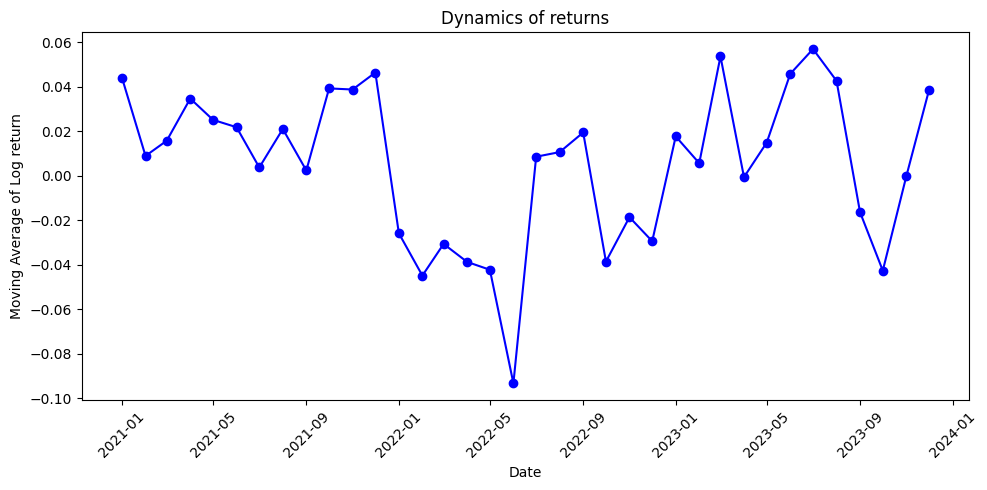

In [24]:
import matplotlib.pyplot as plt

# plot
plt.figure(figsize=(10,5))
plt.plot(food_recent_years['DATE'], food_recent_years['moving_averages'], marker='o', linestyle='-', color='b')

# add titles and labels
plt.title('Dynamics of returns')
plt.xlabel('Date')
plt.ylabel('Moving Average of Log return')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()